# Figure S3. Additional metrics to benchmark performance of ColocBoost with other multi-trait colocalization methods.

- **S3a**. Statistical power and FDR of all methods based on the single top-ranked variant, involving 2, 5,10, and 20 phenotypes with up to five true causal variants, with genotype data and induced colocalization configurations designed to mimic real xQTL datasets (Methods). 
- **S3b**.Statistical power and FDR comparison of ColocBoost and OPERA for GWAS targeted colocalization, evaluated at the gene level, under the same simulation design used in OPERA.
- **S3c**. Statistical power and FDR comparison and **S3d** variant-level precision-recall curves by varying the colocalization score threshold in a simulation design incorporating trait-trait correlations across 2, 5,10, and 20 phenotypes with up to five true causal variants.
- **S3e**. Statistical power and FDR of ColocBoost and HyPrColoc assuming diagonal LD matrix and imposing a single-causal-variant assumption without LD-proximity smoothing in ColocBoost.
- **S3f**. Statistical power and FDR for single trait fine-mapping analysis (FineBoost) with up to five causal variants using SuSiE and FineBoost (the single-trait version of ColocBoost) in simulation scenarios comprising up to five causal variants. 

The error bars in panels b-g represent 95% confidence intervals.

## Figure S3a
Statistical power and FDR of all methods based on the single top-ranked variant, involving 2, 5,10, and 20 phenotypes with up to five true causal variants, with genotype data and induced colocalization configurations designed to mimic real xQTL datasets (Methods). 

In [2]:
library(ggplot2)
library(ggpattern)
library(ggpubr)
library(cowplot)
sumstat = readRDS("Figure_S3a.rds")
colors_man <- c("#B24745FF", "#00A1D5FF", "#79AF97FF", "#DF8F44FF")
p1 <- sumstat %>% 
  ggplot(aes(x = as.character(max_causal), y = power, fill = method)) +
  geom_col(position = "dodge", width = 0.7, colour = "grey20", alpha = 0.8) +
  theme_minimal() + 
  ylim(0, 1.05) + 
  #scale_x_continuous(breaks = 1:max(sumstat$total_causal_var_number)) +  # Ensures x-axis ticks are integers
  facet_wrap(.~ marginal_trait_number,
             labeller = labeller(marginal_trait_number = function(x) paste("Number of Traits:", x)), scales = "free_x", nrow = 1) +
  geom_errorbar(aes(ymin = power - 1.96*power_SD/ sqrt(20) , 
                    ymax = power + 1.96*power_SD/ sqrt(20) ),
                width = .2, position = position_dodge(width = 0.7)) +
  scale_fill_manual(values = colors_man, name = "Methods") +
  # guides(fill = guide_legend(title = "Methods")) + 
  labs(x = "Max Number of True Causal Variants Per Trait", y = "Power", color = "Methods") +
  theme(legend.position = "none",
        axis.title.x = element_text(size = 24), 
        axis.title.y = element_text(size = 30),
        axis.text.x = element_text(size = 22), 
        axis.text.y = element_text(size = 22),
        strip.text = element_text(size = 16, face = "bold"),
        legend.title = element_text(size = 24, face = "bold", margin = margin(l = 0, r= 20)),  # Change legend title font size and style
        legend.text = element_text(size = 24, margin = margin(l = 5, r= 8)),
        text=element_text(size=24,  family="sans")) + theme(
          panel.grid.major = element_blank(),      # Remove major grid lines
          panel.grid.minor = element_blank(),      # Remove minor grid lines
          #     axis.line = element_line(color = "black") # Keep the axis lines
        )

p2 <- sumstat %>% 
  ggplot(aes(x = as.character(max_causal), y = FDR, fill = method)) +
  geom_col(position = "dodge", width = 0.7, colour = "grey20", alpha = 0.8) +
  theme_minimal() + 
  ylim(0, 1) +
  #scale_x_continuous(breaks = 1:max(sumstat$total_causal_var_number)) +  # Ensures x-axis ticks are integers
  facet_wrap(.~ marginal_trait_number,
             labeller = labeller(marginal_trait_number = function(x) paste("Number of Traits:", x)), scales = "free_x", nrow = 1) +
  geom_errorbar(aes(ymin = FDR - 1.96 * FDR_SD / sqrt(20), 
                    ymax = FDR + 1.96 *FDR_SD / sqrt(20)),
                width = .2, position = position_dodge(width = 0.7)) +
  scale_fill_manual(values = colors_man, name = "Methods") +
  # guides(fill = guide_legend(title = "Methods")) + 
  labs(x = "Max Number of True Causal Variants Per Trait", y = "FDR", color = "Methods") +
  geom_hline(yintercept = 0.05, linetype = "dashed", color = "red", linewidth = 0.6) +
  # geom_hline(yintercept = 0.1, linetype = "dashed", color = "blue", linewidth = 0.6) +
  theme(legend.position = "bottom",
        axis.title.x = element_text(size = 24), 
        axis.title.y = element_text(size = 30),
        axis.text.x = element_text(size = 22), 
        axis.text.y = element_text(size = 22),
        strip.text = element_text(size = 16, face = "bold"),
        legend.title = element_text(size = 24, face = "bold", margin = margin(l = 0, r= 20)),  # Change legend title font size and style
        legend.text = element_text(size = 24, margin = margin(l = 5, r= 8)),
        text=element_text(size=24,  family="sans")) + theme(
          panel.grid.major = element_blank(),      # Remove major grid lines
          panel.grid.minor = element_blank(),      # Remove minor grid lines
          # axis.line = element_line(color = "black") # Keep the axis lines
        )

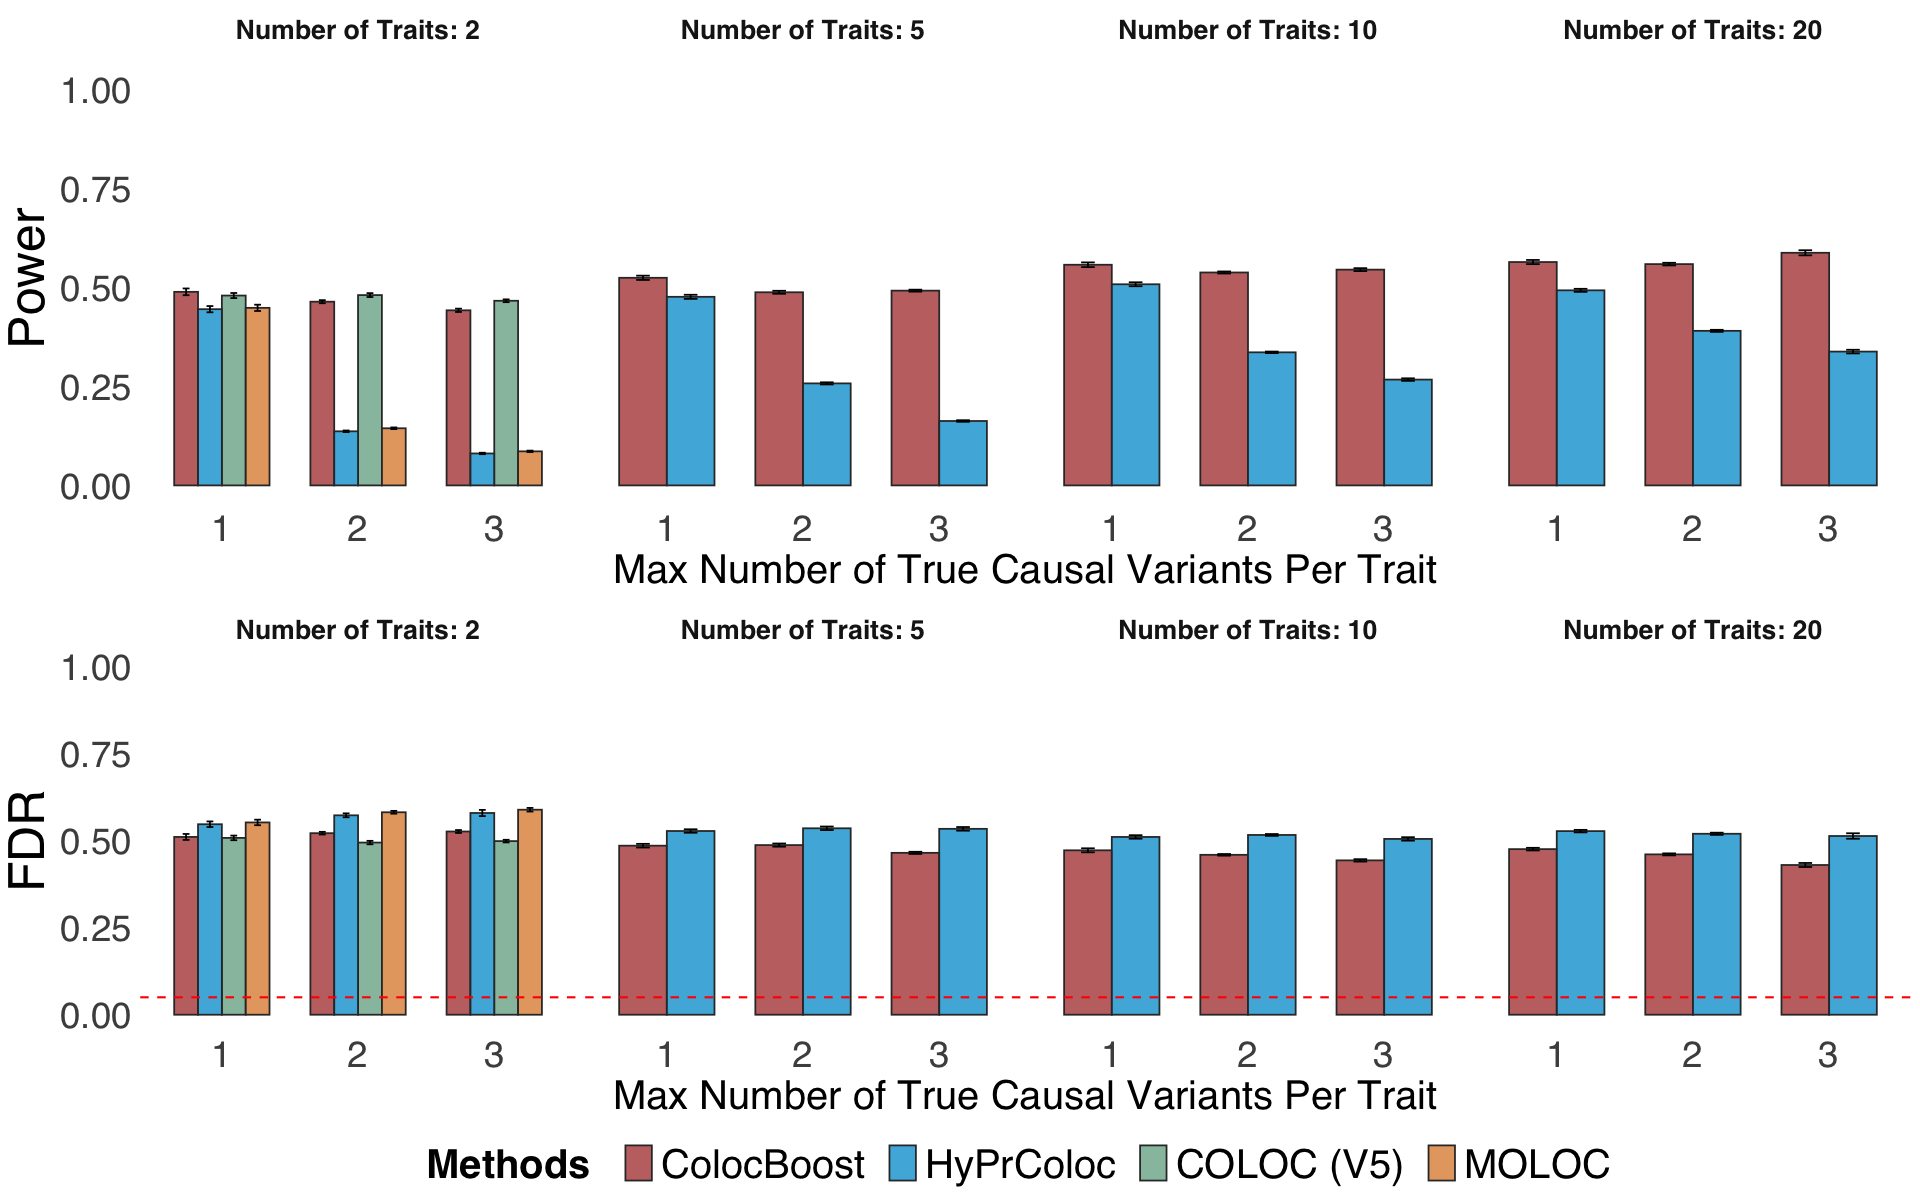

In [4]:
options(repr.plot.width = 16, repr.plot.height = 10)
plot_grid(p1, p2, ncol = 1)

## Figure S3b
Statistical power and FDR comparison of ColocBoost and OPERA for GWAS targeted colocalization, evaluated at the gene level, under the same simulation design used in OPERA.

In [5]:
library(ggplot2)
sumstat = readRDS("Figure_S3b.rds")
colors_man <- c("#B24745FF", "#1d4a9e")
p1 <- sumstat %>% 
  ggplot(aes(x = as.factor(trait), y = power, fill = method)) +
  #facet_wrap( ~ trait, labeller = labeller(trait = function(x) paste("Number of Traits:", x)), scales = "free_x", nrow = 1) +
  geom_col(position = "dodge", width = 0.7, colour = "grey20", alpha = 0.8) +
  theme_minimal() + 
  ylim(0, 1.05)  +  # Ensures x-axis ticks are integers
  geom_errorbar(aes(ymin = power - 1.96*power_SD/ sqrt(20) , 
                    ymax = power + 1.96*power_SD/ sqrt(20) ),
                width = .2, position = position_dodge(width = 0.7)) +
  scale_fill_manual(values = colors_man, name = "Methods") +
  # guides(fill = guide_legend(title = "Methods")) + 
  labs(x = "Number of Traits", y = "Power", color = "Methods") +
  theme(legend.position = "none",
        axis.title.x = element_text(size = 0),
        axis.title.y = element_text(size = 26),
        axis.text.x = element_text(size = 20),
        axis.text.y = element_text(size = 20),
        strip.text = element_text(size = 24, face = "bold"),
        legend.title = element_text(size = 24, face = "bold", margin = margin(l = 0, r= 20)),  # Change legend title font size and style
        legend.text = element_text(size = 20, margin = margin(l = 5, r= 8)),
        text=element_text(size=16,  family="sans")) + theme(
          panel.grid.major = element_blank(),      # Remove major grid lines
          panel.grid.minor = element_blank(),      # Remove minor grid lines
          # axis.line = element_line(color = "black") # Keep the axis lines
        )

p2 <- sumstat %>% 
  ggplot(aes(x = as.factor(trait), y = FDR, fill = method)) +
  geom_col(position = "dodge", width = 0.7, colour = "grey20", alpha = 0.8) +
  theme_minimal() + 
  #facet_wrap( ~ trait, labeller = labeller(trait = function(x) paste("Number of Traits:", x)), scales = "free_x", nrow = 1) +
  ylim(0, 0.2) +  # Ensures x-axis ticks are integers
  geom_errorbar(aes(ymin = FDR - 1.96 * FDR_SD / sqrt(20), 
                    ymax = FDR + 1.96 *FDR_SD / sqrt(20)),
                width = .2, position = position_dodge(width = 0.7)) +
  scale_fill_manual(values = colors_man, name = "Methods") +
  labs(x = "Number of Traits", y = "FDR", color = "Methods") +
  geom_hline(yintercept = 0.05, linetype = "dashed", color = "red", linewidth = 0.6) +
  theme(legend.position = "inside",
        axis.title.x = element_text(size = 24),
        axis.title.y = element_text(size = 26),
        axis.text.x = element_text(size = 20),
        axis.text.y = element_text(size = 20),
        strip.text = element_text(size = 24, face = "bold"),
        legend.title = element_text(size = 24, face = "bold", margin = margin(l = 0, r= 20)),  # Change legend title font size and style
        legend.text = element_text(size = 20, margin = margin(l = 5, r= 8)),
        text=element_text(size=16,  family="sans")) + theme(
          panel.grid.major = element_blank(),      # Remove major grid lines
          panel.grid.minor = element_blank(),      # Remove minor grid lines
          # axis.line = element_line(color = "black") # Keep the axis lines
        )

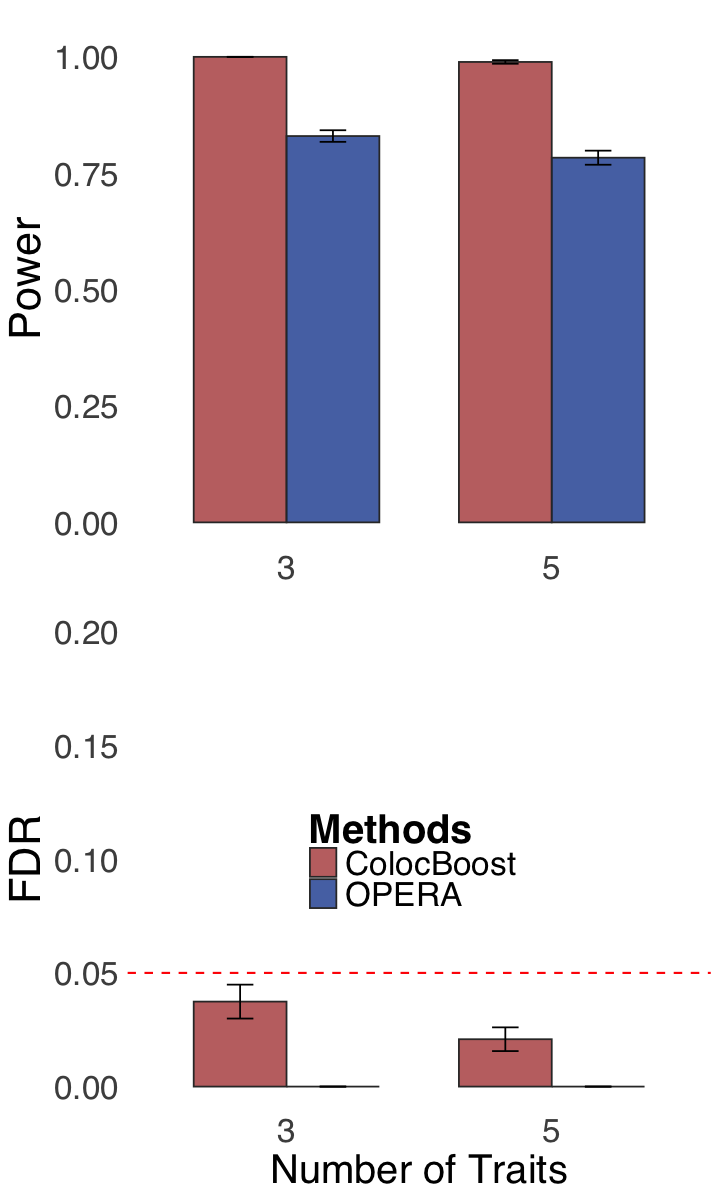

In [7]:
options(repr.plot.width = 6, repr.plot.height = 10)
plot_grid(p1, p2, ncol = 1)

## Figure S3c
Statistical power and FDR comparison by varying the colocalization score threshold in a simulation design incorporating trait-trait correlations across 2, 5,10, and 20 phenotypes with up to five true causal variants.

In [9]:
library(ggplot2)
library(ggpattern)
library(ggpubr)
library(cowplot)
sumstat = readRDS("Figure_S3c.rds")
colors_man <- c("#B24745FF", "#00A1D5FF", "#79AF97FF", "#DF8F44FF")
p1 <- sumstat %>% 
  ggplot(aes(x = as.character(max_causal), y = power, fill = method)) +
  geom_col(position = "dodge", width = 0.7, colour = "grey20", alpha = 0.8) +
  theme_minimal() + 
  ylim(0, 1.05)  +  # Ensures x-axis ticks are integers
  geom_errorbar(aes(ymin = power - 1.96*power_SD/ sqrt(20) , 
                    ymax = power + 1.96*power_SD/ sqrt(20) ),
                width = .2, position = position_dodge(width = 0.7)) +
  scale_fill_manual(values = colors_man, name = "Methods") +
  facet_wrap(.~ marginal_trait_number,
             labeller = labeller(marginal_trait_number = function(x) paste("Number of Traits:", x)), scales = "free_x", nrow = 1) +
  labs(x = "Simulation Design", y = "Power", color = "Methods", title = NULL) +
  theme(legend.position = "none",
        plot.title = element_text(size = 26, face = "bold", hjust = 0.5),
        axis.title.x = element_text(size = 0),
        axis.title.y = element_text(size = 26),
        axis.text.x = element_text(size = 20),
        axis.text.y = element_text(size = 20),
        strip.text = element_text(size = 24, face = "bold"),
        legend.title = element_text(size = 24, face = "bold", margin = margin(l = 0, r= 20)),  # Change legend title font size and style
        legend.text = element_text(size = 20, margin = margin(l = 5, r= 8)),
        text=element_text(size=16,  family="sans")) + theme(
          panel.grid.major = element_blank(),      # Remove major grid lines
          panel.grid.minor = element_blank(),      # Remove minor grid lines
          # axis.line = element_line(color = "black") # Keep the axis lines
        )

p2 <- sumstat %>% 
  ggplot(aes(x = as.character(max_causal), y = FDR, fill = method)) +
  geom_col(position = "dodge", width = 0.7, colour = "grey20", alpha = 0.8) +
  theme_minimal() + 
  ylim(0, 0.2) +  # Ensures x-axis ticks are integers
  geom_errorbar(aes(ymin = FDR - 1.96*sqrt(FDR * (1-FDR)/total_trait_number), 
                    ymax = FDR + 1.96*sqrt(FDR * (1-FDR)/total_trait_number)),
                width = .2, position = position_dodge(width = 0.7)) +
  scale_fill_manual(values = colors_man, name = "Methods") +
  facet_wrap(.~ marginal_trait_number,
             labeller = labeller(marginal_trait_number = function(x) paste("Number of Traits:", x)), scales = "free_x", nrow = 1) +
  labs(x = "Simulation Design", y = "FDR", color = "Methods") +
  geom_hline(yintercept = 0.05, linetype = "dashed", color = "red", linewidth = 0.6) +
  labs(x = "Max Number of True Causal Variants Per Trait", y = "FDR", color = "Methods") +
  #geom_hline(yintercept = 0.1, linetype = "dashed", color = "blue", linewidth = 0.6) +
  theme(legend.position = "inside",
        axis.title.x = element_text(size = 26),
        axis.title.y = element_text(size = 26),
        axis.text.x = element_text(size = 20),
        axis.text.y = element_text(size = 20),
        strip.text = element_text(size = 24, face = "bold"),
        legend.title = element_text(size = 24, face = "bold", margin = margin(l = 0, r= 20)),  # Change legend title font size and style
        legend.text = element_text(size = 20, margin = margin(l = 5, r= 8)),
        legend.justification = c(0, 0.9),
        text=element_text(size=16,  family="sans")) + theme(
          panel.grid.major = element_blank(),      # Remove major grid lines
          panel.grid.minor = element_blank(),      # Remove minor grid lines
          # axis.line = element_line(color = "black") # Keep the axis lines
        )


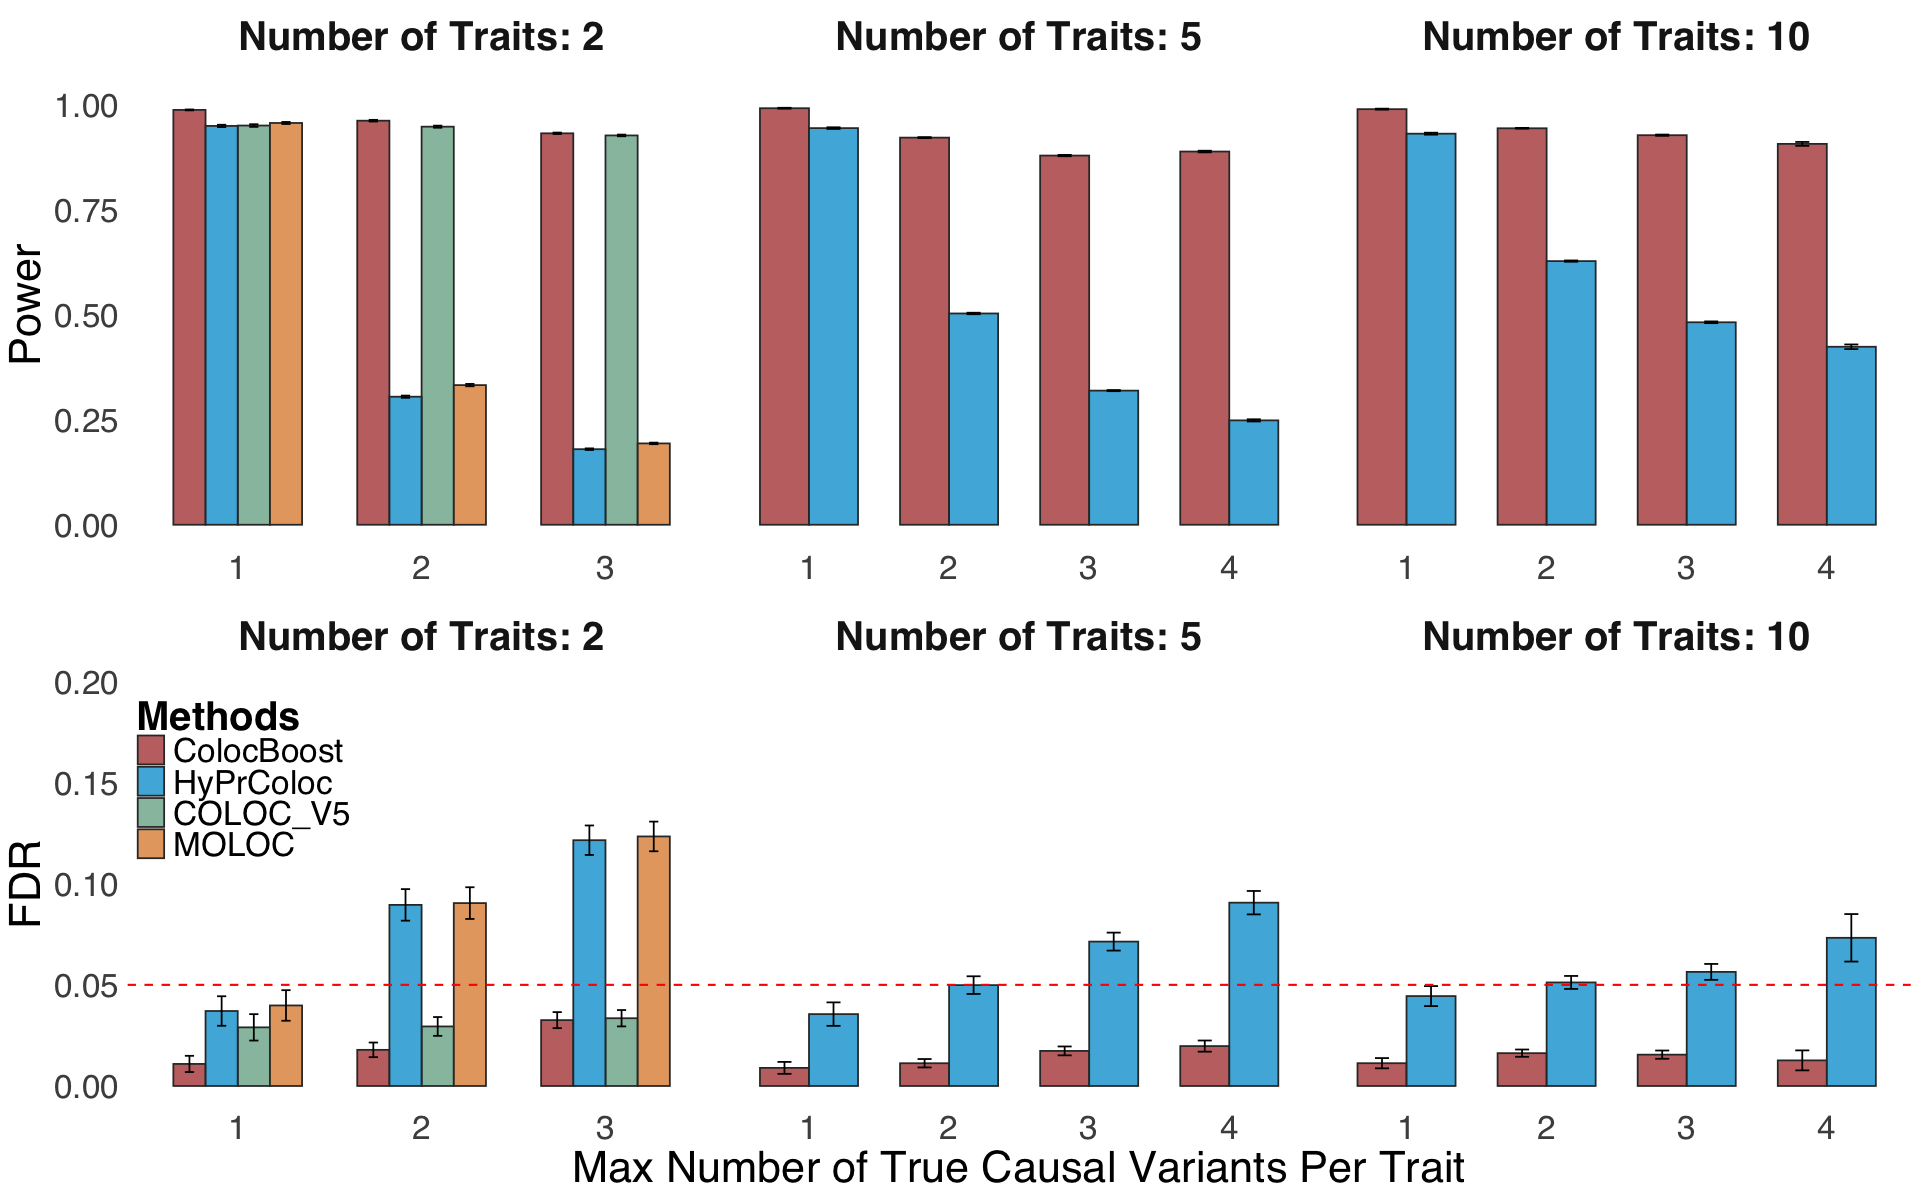

In [13]:
options(repr.plot.width = 16, repr.plot.height = 10)
plot_grid(p1, p2, ncol = 1)

## Figure S3d
Variant-level precision-recall curves by varying the colocalization score threshold in a simulation design incorporating trait-trait correlations across 2, 5,10, and 20 phenotypes with up to five true causal variants.

In [19]:
library(ggplot2)
library(tidyverse)
all_dat = readRDS("Figure_S3d.rds")
colors_man <- c("#EE8E8F", "#87CEFA", "#98B892", "#E69B61")
p = all_dat %>%
  ggplot(aes(x = recall, y = mean, color = method)) +
  # Plot points where label == 1
  geom_point(data = filter(all_dat, label == 1), aes(x = recall, y = mean, color = method), 
             size = 5, shape = 16) +
  geom_line(linewidth= 0.5) + 
  geom_errorbar(aes(ymin = mean - 1.96 * se, 
                    ymax = mean + 1.96 * se), alpha = 0.4) +
  #scale_x_continuous(breaks = 1:max(sumstat$total_causal_var_number)) +  # Ensures x-axis ticks are integers
  facet_wrap(.~ trait,
             labeller = labeller(trait = function(x) paste("Number of Traits:", x)), scales = "free_x", nrow = 1) + 
  labs(x = "Variant-level Recall", y = "Variant-level Precision", color = "Methods")+
  theme_minimal()  +
  scale_color_manual(values = colors_man, name = "Methods")+
  theme(legend.position = "bottom",
        axis.title.x = element_text(margin = margin(t = 10), size = 20), 
        axis.title.y = element_text(size = 20),
        axis.text.x = element_text(size = 14), 
        axis.text.y = element_text(size = 14),
        strip.text = element_text(size = 16, face = "bold"),
        legend.title = element_text(size = 16, face = "bold", margin = margin(l = 0, r= 20)),  # Change legend title font size and style
        legend.text = element_text(size = 16, margin = margin(l = 5, r= 8)),
        text=element_text(size=16,  family="sans")) + theme(
          panel.grid.major = element_blank(),      # Remove major grid lines
          panel.grid.minor = element_blank(),      # Remove minor grid lines
          #axis.line = element_line(color = "black") # Keep the axis lines
        )

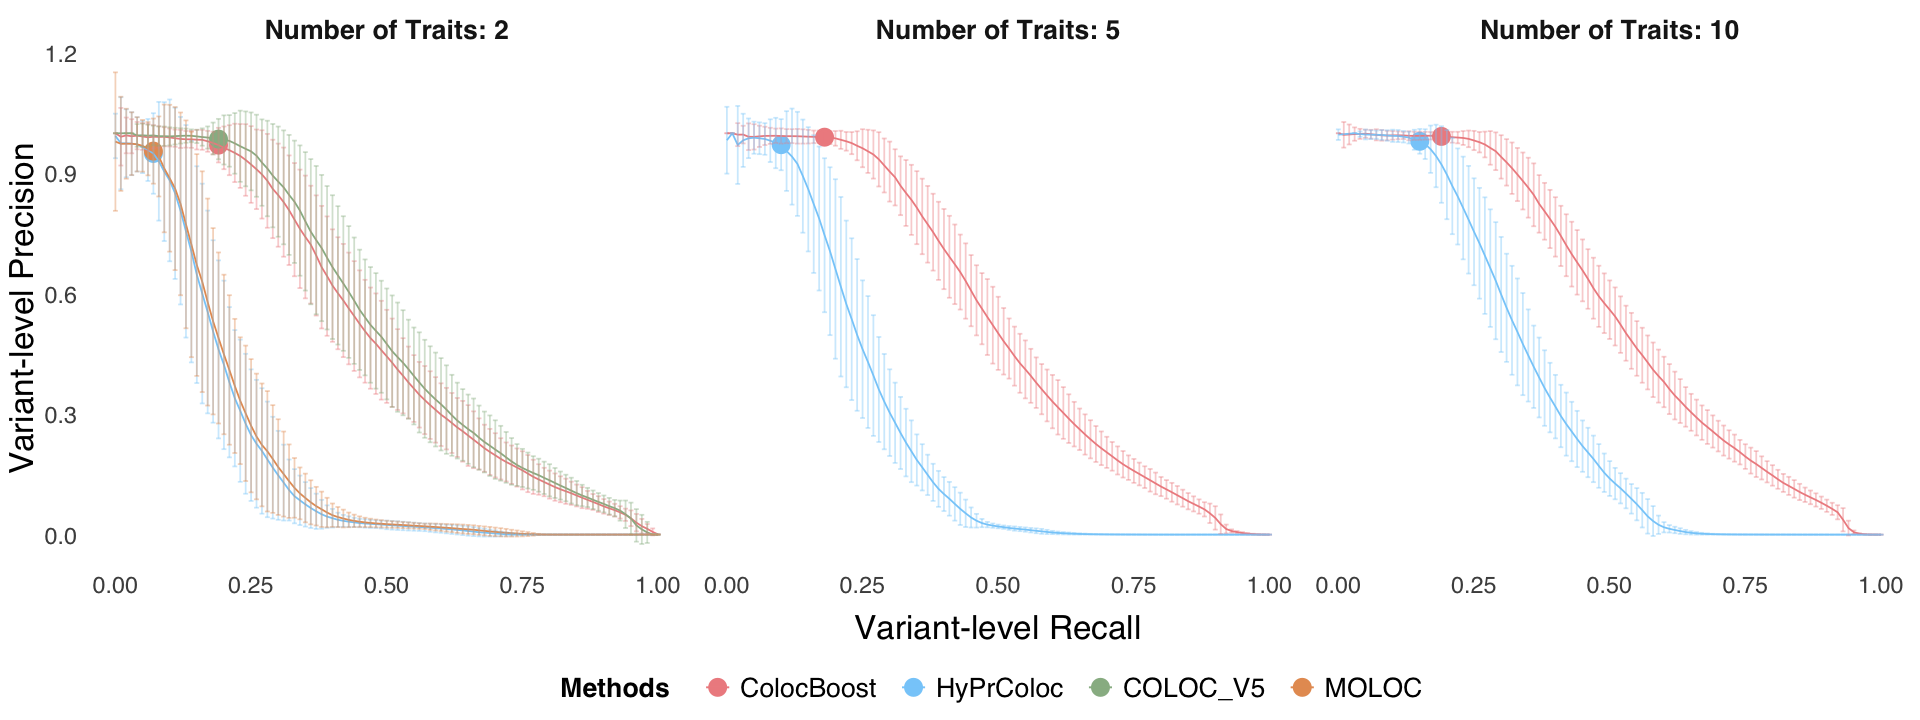

In [21]:
options(repr.plot.width = 16, repr.plot.height = 6)
p

## Figure S3e
Statistical power and FDR of ColocBoost and HyPrColoc assuming diagonal LD matrix and imposing a single-causal-variant assumption without LD-proximity smoothing in ColocBoost.

In [23]:
library(ggplot2)
sumstat = readRDS("Figure_S3e.rds")
colors_man <- c("#B24745FF", "#00A1D5FF")
p1 <- sumstat %>% 
  ggplot(aes(x = as.character(causal_number), y = power, fill = method)) +
  geom_col(position = "dodge", width = 0.7, colour = "grey20") +
  theme_minimal() + 
  ylim(0, 1.05)  +  # Ensures x-axis ticks are integers
  geom_errorbar(aes(ymin = power - 1.96*sqrt(power * (1-power)/total_trait_number), 
                    ymax = power + 1.96*sqrt(power * (1-power)/total_trait_number)),
                width = .2, position = position_dodge(width = 0.7)) +
  scale_fill_manual(values = colors_man, name = "Methods") +
  facet_wrap(.~ trait_number,
             labeller = labeller(trait_number = function(x) paste("Number of Traits:", x)), scales = "free_x", nrow = 1) +
  # guides(fill = guide_legend(title = "Methods")) + 
  labs(x = "Simulation Design", y = "Power", color = "Methods") +
  theme(legend.position = "none",
        plot.title = element_text(size = 26, face = "bold", hjust = 0.5),
        axis.title.x = element_text(size = 0),
        axis.title.y = element_text(size = 26),
        axis.text.x = element_text(size = 0),
        axis.text.y = element_text(size = 20),
        strip.text = element_text(size = 24, face = "bold"),
        legend.title = element_text(size = 24, face = "bold", margin = margin(l = 0, r= 20)),  # Change legend title font size and style
        legend.text = element_text(size = 20, margin = margin(l = 5, r= 8)),
        text=element_text(size=16,  family="sans")) + theme(
          panel.grid.major = element_blank(),      # Remove major grid lines
          panel.grid.minor = element_blank(),      # Remove minor grid lines
          # axis.line = element_line(color = "black") # Keep the axis lines
        )

p2 <- sumstat %>% 
  ggplot(aes(x = as.character(causal_number), y = FDR, fill = method)) +
  geom_col(position = "dodge", width = 0.7, colour = "grey20") +
  theme_minimal() + 
  ylim(0, 0.2) +  # Ensures x-axis ticks are integers
  geom_errorbar(aes(ymin = FDR - 1.96*sqrt(FDR * (1-FDR)/total_trait_number), 
                    ymax = FDR + 1.96*sqrt(FDR * (1-FDR)/total_trait_number)),
                width = .2, position = position_dodge(width = 0.7)) +
  scale_fill_manual(values = colors_man, name = "Methods") +
  facet_wrap(.~ trait_number,
             labeller = labeller(trait_number = function(x) paste("Number of Traits:", x)), scales = "free_x", nrow = 1) +
  # guides(fill = guide_legend(title = "Methods")) + 
  labs(x = "Simulation Design", y = "FDR", color = "Methods") +
  geom_hline(yintercept = 0.05, linetype = "dashed", color = "red", linewidth = 0.6) +
  #geom_hline(yintercept = 0.1, linetype = "dashed", color = "blue", linewidth = 0.6) +
  theme(legend.position = "inside",
        axis.title.x = element_text(size = 0),
        axis.title.y = element_text(size = 26),
        axis.text.x = element_text(size = 20),
        axis.text.y = element_text(size = 20),
        strip.text = element_text(size = 24, face = "bold"),
        legend.title = element_text(size = 24, face = "bold", margin = margin(l = 0, r= 20)),  # Change legend title font size and style
        legend.text = element_text(size = 20, margin = margin(l = 5, r= 8)),
        text=element_text(size=16,  family="sans")) + theme(
          panel.grid.major = element_blank(),      # Remove major grid lines
          panel.grid.minor = element_blank(),      # Remove minor grid lines
          # axis.line = element_line(color = "black") # Keep the axis lines
      )

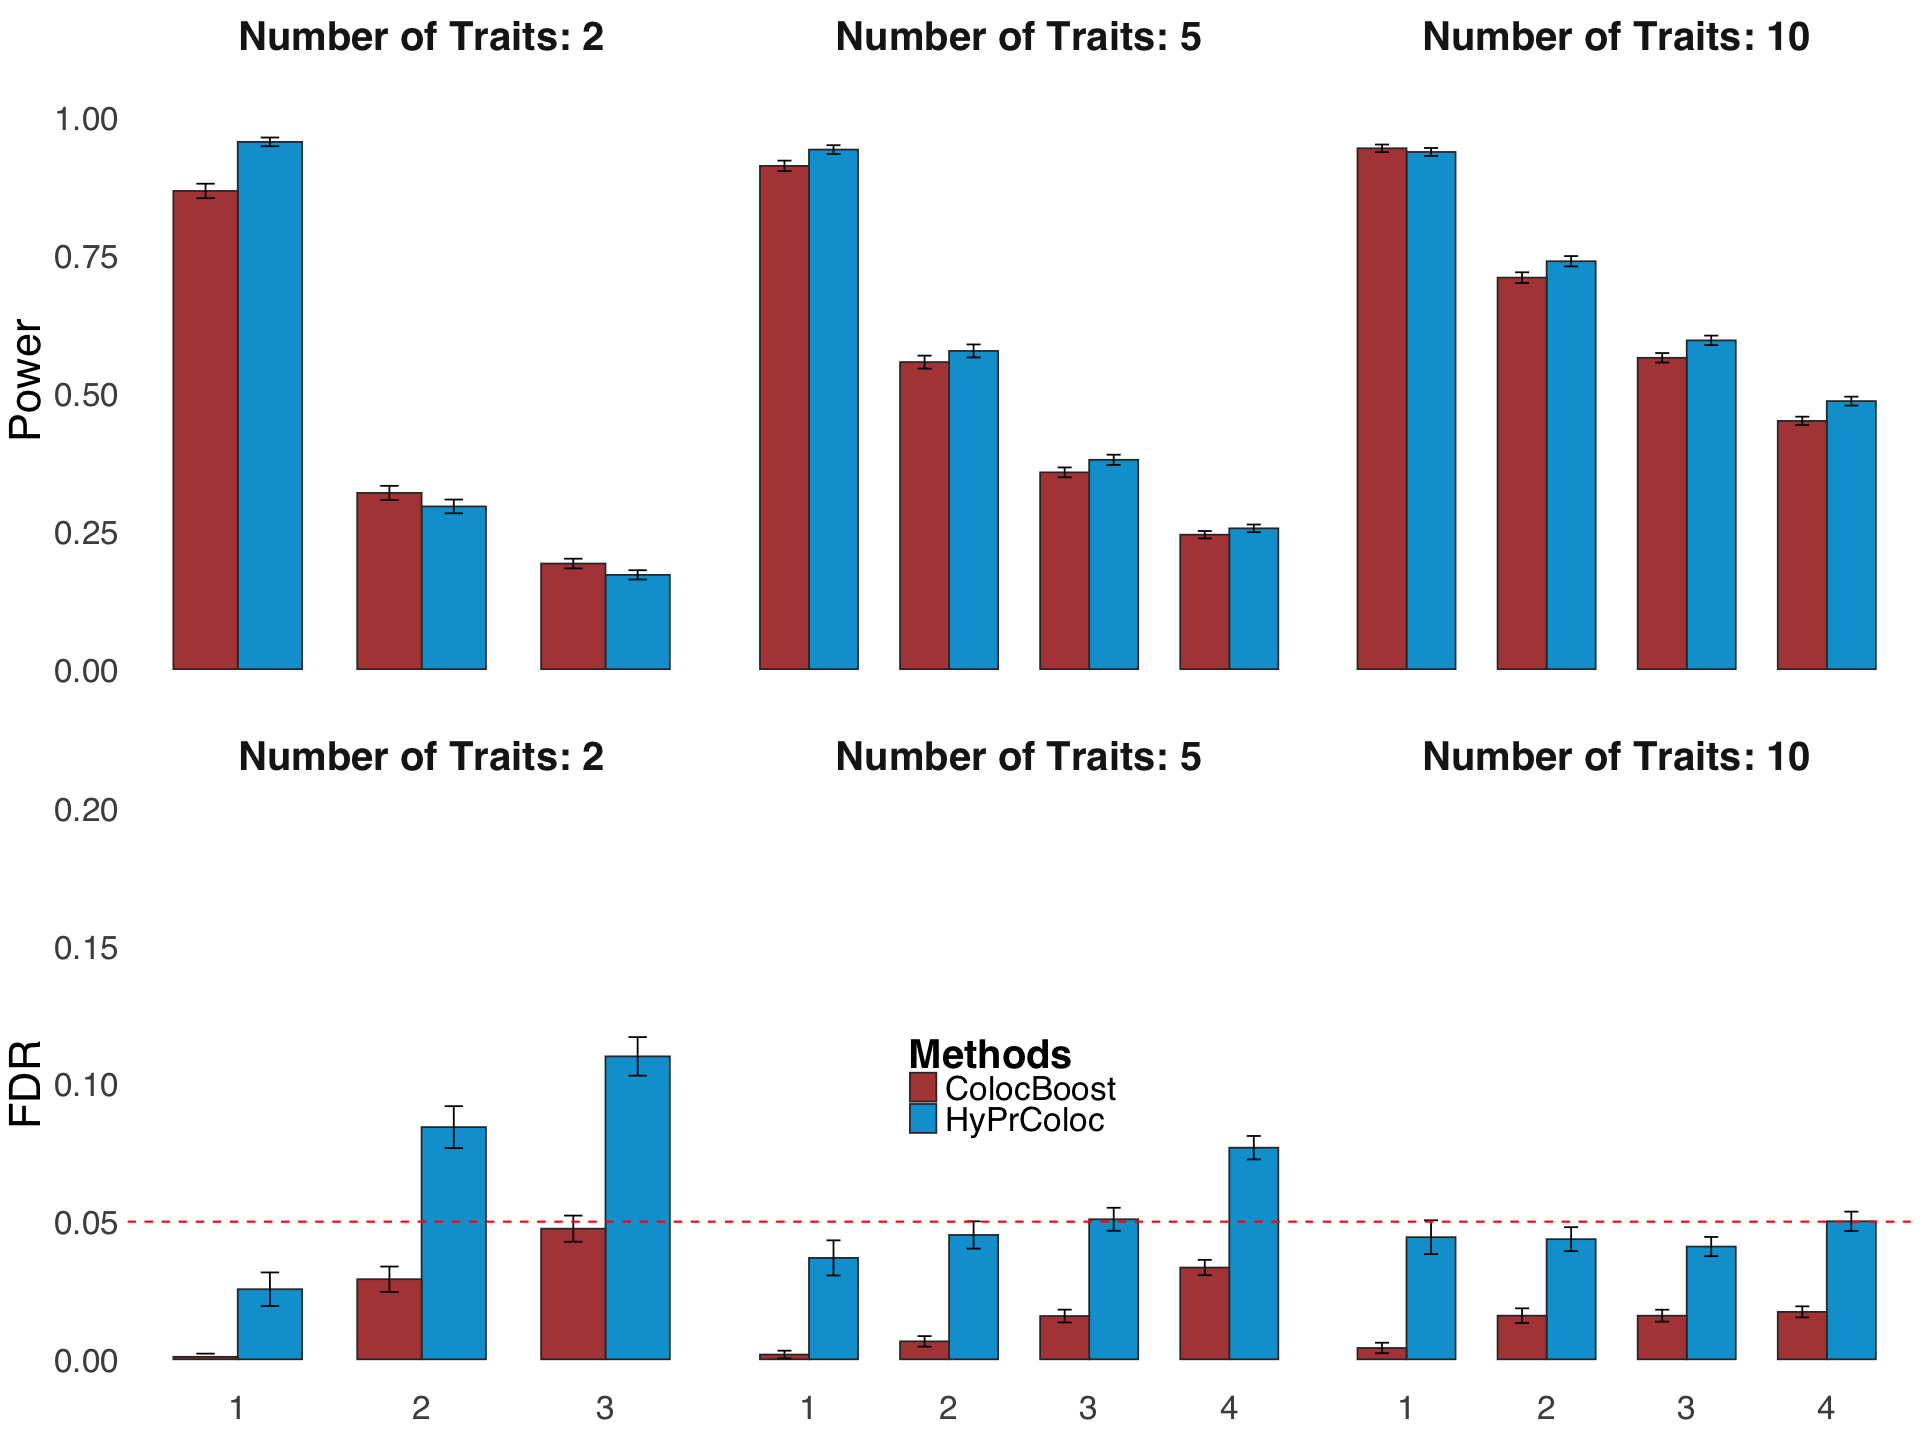

In [25]:
options(repr.plot.width = 16, repr.plot.height = 12)
plot_grid(p1, p2, ncol = 1)

## Figure S3f
Statistical power and FDR for single trait fine-mapping analysis (FineBoost) with up to five causal variants using SuSiE and FineBoost (the single-trait version of ColocBoost) in simulation scenarios comprising up to five causal variants.

In [26]:
library(ggplot2)
sum_tb = readRDS("Figure_S3f.rds")
colors_man <- c("#B24745FF", "#79AF97FF")
p1 <- sum_tb %>% 
  ggplot(aes(x = as.factor(total_variant_number), y = power, fill = method)) +
  geom_col(position = "dodge", width = 0.7, colour = "grey20", alpha = 0.8) +
  theme_minimal() + 
  ylim(0, 1.05) +
  scale_fill_manual(values = colors_man, name = "Methods") +
  geom_errorbar(aes(ymin = power - 1.96*power_SD/ sqrt(20) , 
                    ymax = power + 1.96*power_SD/ sqrt(20) ),
                width = .2, position = position_dodge(width = 0.7)) +
  # guides(fill = guide_legend(title = "Methods")) + 
  labs(x = "Number of True Causal Variants Per Region", y = "Power", color = "Methods") +
  theme(legend.position = "none",
        axis.title.x = element_text(size = 24),
        axis.title.y = element_text(size = 26),
        axis.text.x = element_text(size = 20),
        axis.text.y = element_text(size = 20),
        strip.text = element_text(size = 24, face = "bold"),
        legend.title = element_text(size = 24, face = "bold", margin = margin(l = 0, r= 20)),  # Change legend title font size and style
        legend.text = element_text(size = 24, margin = margin(l = 5, r= 8)),
        text=element_text(size=16,  family="sans")) + theme(
          panel.grid.major = element_blank(),      # Remove major grid lines
          panel.grid.minor = element_blank(),      # Remove minor grid lines
          # axis.line = element_line(color = "black") # Keep the axis lines
        )

p2 <- sum_tb %>% 
  ggplot(aes(x = as.factor(total_variant_number), y = FDR, fill = method)) +
  geom_col(position = "dodge", width = 0.7, colour = "grey20", alpha = 0.8) +
  theme_minimal() + 
  ylim(0, 0.2) +
  #scale_x_continuous(breaks = 1:max(sumstat$total_causal_var_number)) +  # Ensures x-axis ticks are integers
  #geom_errorbar(aes(ymin = FDR - 1.96 * FDR_SD / sqrt(20), 
  #                 ymax = FDR + 1.96 *FDR_SD / sqrt(20)),
  #            width = .2, position = position_dodge(width = 0.7)) +
  scale_fill_manual(values = colors_man, name = "Methods") +
  # guides(fill = guide_legend(title = "Methods")) + 
  labs(x = "Number of True Causal Variants Per Region", y = "FDR", color = "Methods") +
  geom_errorbar(aes(ymin = FDR - 1.96 * FDR_SD / sqrt(20), 
                    ymax = FDR + 1.96 *FDR_SD / sqrt(20)),
                width = .2, position = position_dodge(width = 0.7)) +
  geom_hline(yintercept = 0.05, linetype = "dashed", color = "red", linewidth = 0.6) +
  # geom_hline(yintercept = 0.1, linetype = "dashed", color = "blue", linewidth = 0.6) +
  theme(legend.position = "inside",
        axis.title.x = element_text(size = 24),
        axis.title.y = element_text(size = 26),
        axis.text.x = element_text(size = 20),
        axis.text.y = element_text(size = 20),
        strip.text = element_text(size = 24, face = "bold"),
        legend.title = element_text(size = 24, face = "bold", margin = margin(l = 0, r= 20)),  # Change legend title font size and style
        legend.text = element_text(size = 24, margin = margin(l = 5, r= 8)),
        text=element_text(size=16,  family="sans")) + theme(
          panel.grid.major = element_blank(),      # Remove major grid lines
          panel.grid.minor = element_blank(),      # Remove minor grid lines
          # axis.line = element_line(color = "black") # Keep the axis lines
        )


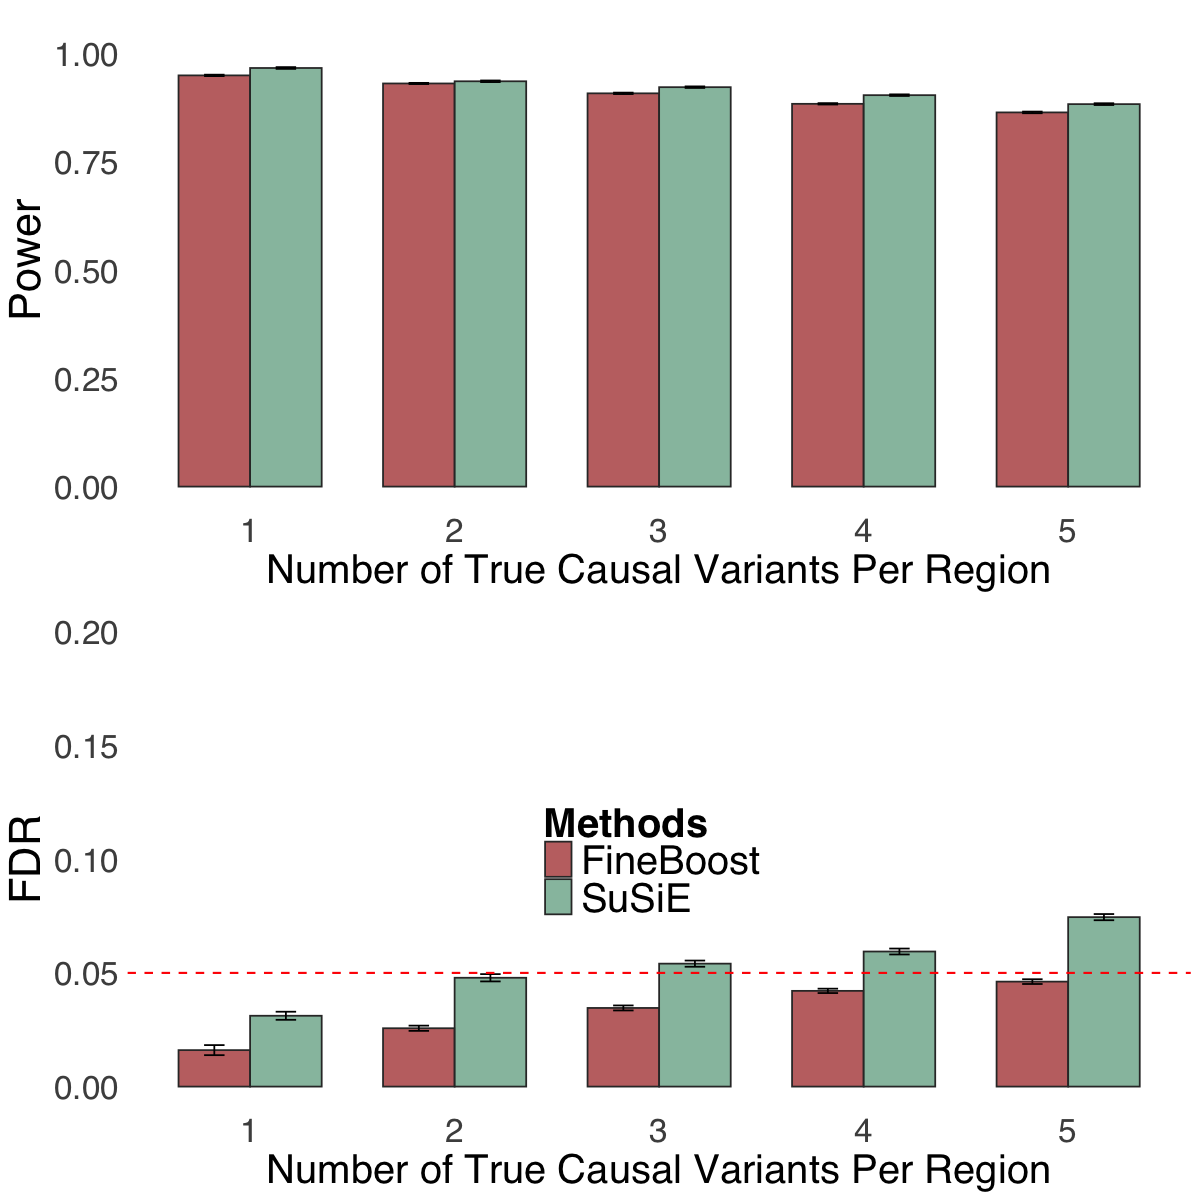

In [29]:
options(repr.plot.width = 10, repr.plot.height = 10)
plot_grid(p1, p2, ncol = 1)